In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, confusion_matrix
import numpy as np
from xgboost import XGBClassifier

In [2]:
df_red = pd.read_csv('winequality-red.csv', sep=';')
df_white = pd.read_csv('winequality-white.csv', sep=';')

In [3]:
# Пропусков нет
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
# Пропусков нет
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [5]:
# Создаём новую колонку
df_red['is_red'] = 1
display(df_red['is_red'].value_counts())
df_white['is_red'] = 0
df_white['is_red'].value_counts()

# объединяем два датафрейма в один

df = pd.concat([df_red, df_white], axis = 0)
df.info()

is_red
1    1599
Name: count, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  is_red                6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


<Axes: >

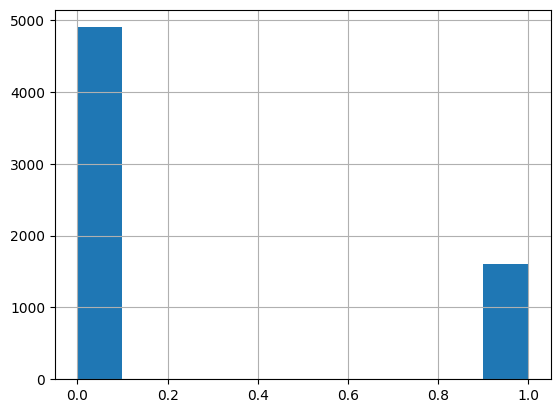

In [6]:
# Распределение по классам
df['is_red'].hist()

In [7]:
# Распределение
df['is_red'].value_counts(normalize=True)

is_red
0    0.753886
1    0.246114
Name: proportion, dtype: float64

In [8]:
# Разделяем данные на фичи и таргет
features = df.drop('is_red', axis = 1)
target = df['is_red']

# Разделяем данные на обучающую и тестовую выборки
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=42)

# близко к исходной пропорции
display(target_train.value_counts(normalize=True))
display(target_test.value_counts(normalize=True))

is_red
0    0.760878
1    0.239122
Name: proportion, dtype: float64

is_red
0    0.732923
1    0.267077
Name: proportion, dtype: float64

In [19]:
# определяем метрику balanced accuracy store
# почему они не совпадают -- неизвестно
def balanced_accuracy_score_custom(y_true, y_pred):
    if len(y_pred) != len(y_true):
        print('Error! Lengths of dataframes are not the same')
        return
    conf_matrix = confusion_matrix(y_true, y_pred)
   
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    return (TP/(TP + FN) + TN/(TN + FP))/2 
    
# Проверка правильности реализации
y_test_true = pd.Series([0, 1, 1, 1, 1, 1, 1, 0, 1])
y_test_pred = pd.Series([1, 0, 1, 1, 1, 1, 0, 0, 1])

print(f'Библиотечная реализация balanced_accuracy_store: {balanced_accuracy_score(y_test_true, y_test_pred)}')
print(f'Самостоятельная реализация balanced_accuracy_store: {balanced_accuracy_score_custom(y_test_true, y_test_pred)}')

Библиотечная реализация balanced_accuracy_store: 0.6071428571428572
Самостоятельная реализация balanced_accuracy_store: 0.6071428571428572


Метрика balanced_accuracy_score на обучающей выборке: 0.9994359354938054
Метрика balanced_accuracy_score на тестовой выборке: 0.9810299597209486


,depth,bac_train,bac_test
11,12,0.99729,0.981137


,depth,bac_train,bac_test
0,1,0.879682,0.863919
1,2,0.958701,0.950618
2,3,0.962955,0.949709
3,4,0.977155,0.970349
4,5,0.983360,0.976217
5,6,0.984304,0.976012
6,7,0.988167,0.978101
7,8,0.990018,0.977788
8,9,0.992753,0.978833
9,10,0.994286,0.979565


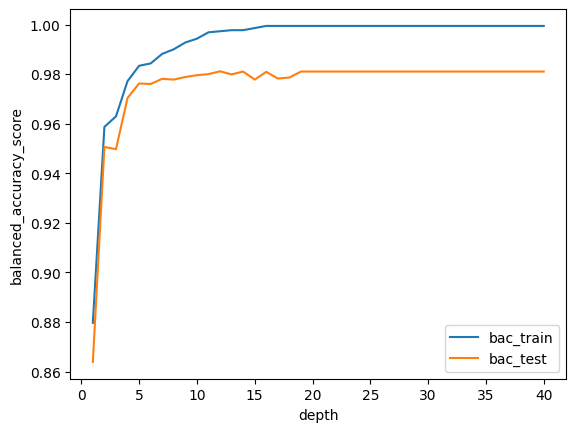

In [10]:
# Ищем лучшую модель решающего дерева, посмотрим на дефолтное

model = DecisionTreeClassifier(random_state=2)
model.fit(features_train, target_train)
y_pred_tree = model.predict(features_test)

print(f'Метрика balanced_accuracy_score на обучающей выборке: {balanced_accuracy_score(target_train, model.predict(features_train))}')
print(f'Метрика balanced_accuracy_score на тестовой выборке: {balanced_accuracy_score(target_test, y_pred_tree)}')

# Поварьируем глубину обучающего дерева

results_depth = []

for depth in range(1, 41):
    model = DecisionTreeClassifier(max_depth=depth, random_state=2)
    model.fit(features_train, target_train)
    y_pred_train = model.predict(features_train)
    y_pred_test = model.predict(features_test)
    results_depth.append([depth, balanced_accuracy_score(target_train, y_pred_train), balanced_accuracy_score(target_test, y_pred_test)])

results_depth_pd = pd.DataFrame(results_depth, columns = ['depth', 'bac_train', 'bac_test'])
results_depth_pd.set_index('depth')['bac_train'].plot(label = 'bac_train')
results_depth_pd.set_index('depth')['bac_test'].plot(label = 'bac_test')
plt.legend()
plt.ylabel('balanced_accuracy_score');

display(results_depth_pd[results_depth_pd['bac_test'] == results_depth_pd['bac_test'].max()])
display(results_depth_pd.head(10))


Ловим эффект переобучения из-за чрезмерного усложнения дерева. Видно, что оптимальный результат достигается на глубине ~ 5, после этого метрика на тестовой выборке либо не увеличивается, либо увеличивается незначительно. Максимальное значение метрики balanced_accuracy_score достигается на глубине 12. 

Тем не менее я считаю, что использование дерева с глубиной 12 нецелесообразно, поскольку этот результат не воспроизводится при изменении random_state (максимум скачет по большим глубинам), а значение при глубине 5 модель устойчиво эффективна и не переобучена. 

,min_samples_split,bac_train,bac_test
0,2,0.999436,0.98103


,min_samples_split,bac_train,bac_test
0,2,0.999436,0.981030
1,3,0.997719,0.978306
2,4,0.996002,0.977574
3,5,0.994421,0.977681
4,6,0.993292,0.975270
5,7,0.991735,0.973590
6,8,0.991735,0.973590
7,9,0.991306,0.974430
8,10,0.991171,0.973171
9,11,0.989479,0.972858


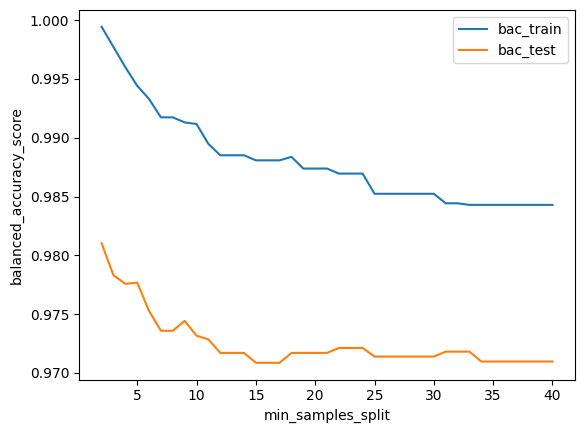

In [11]:
# Поэкспериментируем теперь с параметром min_samples_split=2

results_samples = []

for min_sample in range(2, 41):
    model = DecisionTreeClassifier(min_samples_split=min_sample, random_state=2)
    model.fit(features_train, target_train)
    y_pred_train = model.predict(features_train)
    y_pred_test = model.predict(features_test)
    results_samples.append([min_sample, balanced_accuracy_score(target_train, y_pred_train), balanced_accuracy_score(target_test, y_pred_test)])

results_samples_pd = pd.DataFrame(results_samples, columns = ['min_samples_split', 'bac_train', 'bac_test'])
results_samples_pd.set_index('min_samples_split')['bac_train'].plot(label = 'bac_train')
results_samples_pd.set_index('min_samples_split')['bac_test'].plot(label = 'bac_test')
plt.legend()
plt.ylabel('balanced_accuracy_score');

display(results_samples_pd[results_samples_pd['bac_test'] == results_samples_pd['bac_test'].max()])
display(results_samples_pd.head(10))

Возникает эффект недообучения, лучше всего оставить дерево с min_samples = 2 

Итог: лучшее дерево с min_samples_split = 2, max_depth = 12, значение метрики bas на тестовой выборке 0,981

In [12]:
# Экспериментируем со случайным лесом
# Сначала дефолтный вариант

model = RandomForestClassifier(random_state=2)
model.fit(features_train, target_train)
y_pred = model.predict(features_test)
print(f'Метрика balanced_accuracy_score для дефолтного случайного леса на тренировочной выборке\
    {balanced_accuracy_score(target_train, model.predict(features_train))}')
print(f'Метрика balanced_accuracy_score для дефолтного случайного леса на тестовой выборке {balanced_accuracy_score(target_test, y_pred)}')


Метрика balanced_accuracy_score для дефолтного случайного леса на тренировочной выборке    0.9994359354938054
Метрика balanced_accuracy_score для дефолтного случайного леса на тестовой выборке 0.9938198160551293


Результат заметно лучше, чем у просто одного дерева. Зайдя в документацию RandomForestClassifier мы можем увидеть следующий интересные для варьирования гиперпараметры:

1. n_estimators -- количество деревьев в лесу
2. max_depth -- максимальная глубина деревьев

,number_of_trees,bac_train,bac_test
84,85,0.999436,0.99382
85,86,0.999436,0.99382
86,87,0.999436,0.99382
87,88,0.999436,0.99382
88,89,0.999436,0.99382
89,90,0.999436,0.99382
90,91,0.999436,0.99382
91,92,0.999436,0.99382
92,93,0.999436,0.99382
93,94,0.999436,0.99382


,number_of_trees,bac_train,bac_test
0,1,0.986867,0.971081
1,2,0.977253,0.956953
2,3,0.994151,0.978735
3,4,0.991281,0.972663
4,5,0.996861,0.988684
5,6,0.994850,0.988792
6,7,0.998148,0.991096
7,8,0.996861,0.989212
8,9,0.999007,0.991516
9,10,0.998578,0.990364


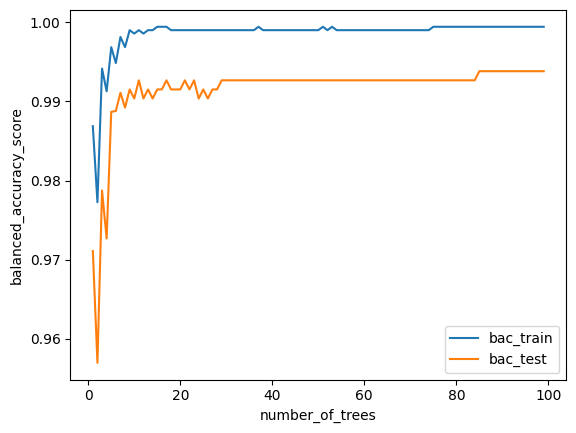

In [13]:
# Поварьируем количество деревьев

results_forest = []

for n in range(1, 100):
    model = RandomForestClassifier(n_estimators=n, random_state=2)
    model.fit(features_train, target_train)
    y_pred_train = model.predict(features_train)
    y_pred_test = model.predict(features_test)
    results_forest.append([n, balanced_accuracy_score(target_train, y_pred_train), balanced_accuracy_score(target_test, y_pred_test)])

results_forest_pd = pd.DataFrame(results_forest, columns = ['number_of_trees', 'bac_train', 'bac_test'])
results_forest_pd.set_index('number_of_trees')['bac_train'].plot(label = 'bac_train')
results_forest_pd.set_index('number_of_trees')['bac_test'].plot(label = 'bac_test')
plt.legend()
plt.ylabel('balanced_accuracy_score');

display(results_forest_pd[results_forest_pd['bac_test'] == results_forest_pd['bac_test'].max()])
display(results_forest_pd.head(10))

Лучший случайный лес получился при 84 -- 98 деревьях, результат метрики bas на тестовой выборке 0,99382. Ситауация с переобученностью лучше, чем в случае одного решающего дерева.

,max_depth,bac_train,bac_test
12,13,0.999436,0.994972


,max_depth,bac_train,bac_test
0,1,0.855120,0.829806
1,2,0.947848,0.939145
2,3,0.974188,0.970251
3,4,0.985592,0.978735
4,5,0.989430,0.986907
5,6,0.992569,0.990364
6,7,0.993562,0.990364
7,8,0.994421,0.990364
8,9,0.996567,0.991516
9,10,0.998148,0.991516


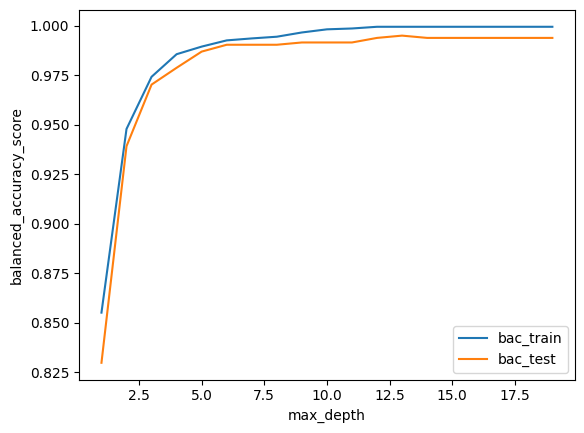

In [14]:
# Поварьиуруем глубину деревьев в случайном лесу

results_forest = []

for n in range(1, 20):
    model = RandomForestClassifier(max_depth=n, random_state=2)
    model.fit(features_train, target_train)
    y_pred_train = model.predict(features_train)
    y_pred_test = model.predict(features_test)
    results_forest.append([n, balanced_accuracy_score(target_train, y_pred_train), balanced_accuracy_score(target_test, y_pred_test)])

results_forest_pd = pd.DataFrame(results_forest, columns = ['max_depth', 'bac_train', 'bac_test'])
results_forest_pd.set_index('max_depth')['bac_train'].plot(label = 'bac_train')
results_forest_pd.set_index('max_depth')['bac_test'].plot(label = 'bac_test')
plt.legend()
plt.ylabel('balanced_accuracy_score');

display(results_forest_pd[results_forest_pd['bac_test'] == results_forest_pd['bac_test'].max()])
display(results_forest_pd.head(10))

Лучший случайный лес получился при глубине 13, значение метрики bas на тестовой выборке 0,9950.

In [15]:
# Поварьируем теперь оба параметра, n_estimators и max_depth

results_forest_test = []
results_forest_train = []

for depth in range(1, 20):
    print(f'Отработан шаг {depth}')
    for n in range(1, 101):
        model = RandomForestClassifier(n_estimators=n, max_depth=depth, random_state=2)
        model.fit(features_train, target_train)
        y_pred_train = model.predict(features_train)
        y_pred_test = model.predict(features_test)
        results_forest.append([n, balanced_accuracy_score(target_train, y_pred_train), balanced_accuracy_score(target_test, y_pred_test)])
        results_forest_test.append([depth, n, balanced_accuracy_score(target_test, y_pred_test)])
        results_forest_train.append([depth, n, balanced_accuracy_score(target_train, y_pred_train)])

forest_pd = pd.DataFrame(results_forest_test, columns = ['depth', 'number_of_trees', 'bas_test'])
forest_pd[forest_pd['bas_test'] == forest_pd['bas_test'].max()]

Отработан шаг 1
Отработан шаг 2
Отработан шаг 3
Отработан шаг 4
Отработан шаг 5
Отработан шаг 6
Отработан шаг 7
Отработан шаг 8
Отработан шаг 9
Отработан шаг 10
Отработан шаг 11
Отработан шаг 12
Отработан шаг 13
Отработан шаг 14
Отработан шаг 15
Отработан шаг 16
Отработан шаг 17
Отработан шаг 18
Отработан шаг 19


,depth,number_of_trees,bas_test
1124,12,25,0.994972
1145,12,46,0.994972
1298,13,99,0.994972
1299,13,100,0.994972


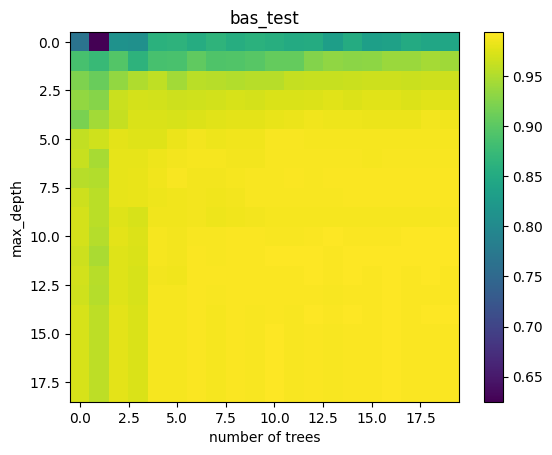

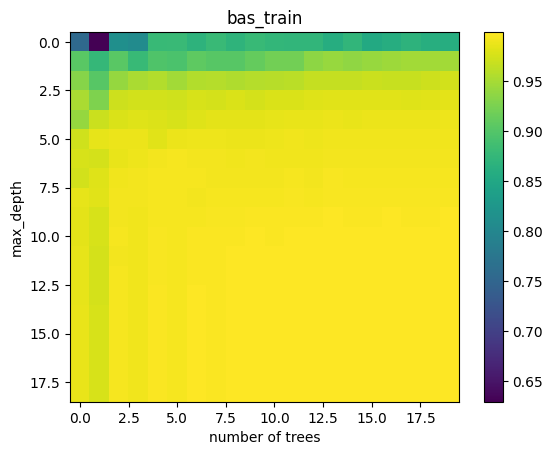

In [16]:
# Изобразим метрику на тестовой выборке на двумерном графике


# plt.imshow(results_forest_train, cmap='viridis', interpolation='nearest')
# plt.colorbar()  # Добавляем цветовую шкалу
# plt.title('bas_train')
# plt.show()

results_forest_test_np = np.zeros((19, 100))
for i in range(len(results_forest_test)):
    results_forest_test_np[results_forest_test[i][0] - 1, results_forest_test[i][1] - 1] = results_forest_test[i][2]

# тут можно с помощью срезов рассматривать разные куски этой диаграммы
# главный вывод -- лучшие модели получаются, когда max_depth, n_estimators > 5
plt.imshow(results_forest_test_np[:20, :20], cmap='viridis', interpolation='nearest')
plt.colorbar()  # Добавляем цветовую шкалу
plt.title('bas_test')
plt.xlabel('number of trees')
plt.ylabel('max_depth')
plt.show()

results_forest_train_np = np.zeros((19, 100))
for i in range(len(results_forest_train)):
    results_forest_train_np[results_forest_train[i][0] - 1, results_forest_train[i][1] - 1] = results_forest_train[i][2]

# тут можно с помощью срезов рассматривать разные куски этой диаграммы
# главный вывод -- лучшие модели получаются, когда max_depth, n_estimators > 5
plt.imshow(results_forest_train_np[:20, :20], cmap='viridis', interpolation='nearest')
plt.colorbar()  # Добавляем цветовую шкалу
plt.title('bas_train')
plt.xlabel('number of trees')
plt.ylabel('max_depth')
plt.show()

Итог: лучший случайный лес получается при значении гиперпараметров (n_estimators, max_depth) = (12, 25), (12, 46), (13, 99), (13, 100) значение метрики на тестовой выборке: 0,9950

Результаты ожидаемы с учётом параметров, которые мы до этого получали при варьировании.

Лучшие леса получаются при значениях параметров max_depth, n_estimators > 5, они не переобучаются.

In [17]:
# Перейдём к градиентному бустингу, начнём с дефолтной модели
# Выделяем часть данных для валидации в процессе исполнения алгоритма
features_train_xgb, features_val, target_train_xgb, target_val = train_test_split(features_train, target_train, test_size=0.2, random_state=2)

model = XGBClassifier()
model.fit(features_train_xgb, target_train_xgb, eval_set=[(features_train_xgb, target_train_xgb), (features_val, target_val)])

pred_train = model.predict(features_train)
pred_test = model.predict(features_test)

print(f'Метрика bas обучающей выборке: {balanced_accuracy_score(pred_train, target_train)}')
print(f'Метрика bas на тестовой выборке: {balanced_accuracy_score(pred_test, target_test)}')


[0]	validation_0-logloss:0.32560	validation_1-logloss:0.33655
[1]	validation_0-logloss:0.22816	validation_1-logloss:0.23930
[2]	validation_0-logloss:0.16696	validation_1-logloss:0.17897
[3]	validation_0-logloss:0.12490	validation_1-logloss:0.13842
[4]	validation_0-logloss:0.09451	validation_1-logloss:0.10848
[5]	validation_0-logloss:0.07212	validation_1-logloss:0.08614
[6]	validation_0-logloss:0.05643	validation_1-logloss:0.07118
[7]	validation_0-logloss:0.04477	validation_1-logloss:0.06001
[8]	validation_0-logloss:0.03610	validation_1-logloss:0.05157
[9]	validation_0-logloss:0.02981	validation_1-logloss:0.04540
[10]	validation_0-logloss:0.02451	validation_1-logloss:0.04078
[11]	validation_0-logloss:0.02039	validation_1-logloss:0.03749
[12]	validation_0-logloss:0.01727	validation_1-logloss:0.03546
[13]	validation_0-logloss:0.01467	validation_1-logloss:0.03341
[14]	validation_0-logloss:0.01249	validation_1-logloss:0.03197
[15]	validation_0-logloss:0.01077	validation_1-logloss:0.03121
[1

Дефолтный XGBClassifier() показал результат на тестовой выборке 0,9959, что немного лучше, чем у случайного леса

In [18]:
# Поварьируем теперь гиперпараметры

features_train_xgb, features_val, target_train_xgb, target_val = train_test_split(features_train, target_train, test_size=0.2, random_state=2)

model = XGBClassifier(n_estimators = 20, max_depth = 5, learning_rate = 0.2)
model.fit(features_train_xgb, target_train_xgb, eval_set=[(features_train_xgb, target_train_xgb), (features_val, target_val)])

pred_train = model.predict(features_train)
pred_test = model.predict(features_test)

print(f'Метрика bas обучающей выборке: {balanced_accuracy_score(pred_train, target_train)}')
print(f'Метрика bas на тестовой выборке: {balanced_accuracy_score(pred_test, target_test)}')

[0]	validation_0-logloss:0.39037	validation_1-logloss:0.40264
[1]	validation_0-logloss:0.30178	validation_1-logloss:0.31356
[2]	validation_0-logloss:0.23996	validation_1-logloss:0.25183
[3]	validation_0-logloss:0.19389	validation_1-logloss:0.20590
[4]	validation_0-logloss:0.15783	validation_1-logloss:0.17084
[5]	validation_0-logloss:0.13020	validation_1-logloss:0.14348
[6]	validation_0-logloss:0.10851	validation_1-logloss:0.12192
[7]	validation_0-logloss:0.09093	validation_1-logloss:0.10514
[8]	validation_0-logloss:0.07657	validation_1-logloss:0.09129
[9]	validation_0-logloss:0.06461	validation_1-logloss:0.07929
[10]	validation_0-logloss:0.05499	validation_1-logloss:0.07051
[11]	validation_0-logloss:0.04713	validation_1-logloss:0.06286
[12]	validation_0-logloss:0.04054	validation_1-logloss:0.05707
[13]	validation_0-logloss:0.03523	validation_1-logloss:0.05267
[14]	validation_0-logloss:0.03073	validation_1-logloss:0.04940
[15]	validation_0-logloss:0.02707	validation_1-logloss:0.04622
[1

Возьмём небольшое количество итераций градиентного бустинга:

n_estimators = 20, max_depth = 5, learning_rate = 0.1
Метрика bas обучающей выборке: 0.9959070884441938
Метрика bas на тестовой выборке: 0.9910501076147236

n_estimators = 20, max_depth = 10, learning_rate = 0.1
Метрика bas обучающей выборке: 0.995738871886531
Метрика bas на тестовой выборке: 0.9914705882352941

n_estimators = 20, max_depth = 10, learning_rate = 0.2
Метрика bas обучающей выборке: 0.9970877827481275
Метрика bas на тестовой выборке: 0.9914705882352941

n_estimators = 20, max_depth = 5, learning_rate = 0.2
Метрика bas обучающей выборке: 0.9968174406582619
Метрика bas на тестовой выборке: 0.9898774509803921


Примеры выставления параметров:

n_estimators = 100, max_depth = 5, learning_rate = 0.05, bas_test = 0,9942
n_estimators = 200, max_depth = 5, learning_rate = 0.05, bas_test = 0,9935

Попробуем выставить
n_estimators = 200, max_depth = 5, learning_rate = 0.05, bas_test = 0,9935
с early_stopping_rounds = 5
остановка на 173 раунде, bas_test = 0,9935

Выставим для интереса:

n_estimators = 300, max_depth = 5, learning_rate = 0.02, early_stopping_rounds = 5
не остановился 
bas_test = 0,9942

n_estimators = 500, max_depth = 5, learning_rate = 0.02, early_stopping_rounds = 5
остановился на 398 раунде
bas_test = 0,9951 -- лучшее, что я смог выжать из самостоятельного подбора параметров


Лучше всего себя показала дефолтная (без параметров) модель XGBoostClassifier(), значение метрики bas на тестовой выборке 0,9959.
Хорошие результаты показал случайный лес при max_depth = 12, n_estimator = 25, метрика bas 0,9950 + отсутствие переобученности.